# R转Python

## 6.2 统计分析

#### （1）数据读入

In [2]:
# 导入Python做数据处理的模块pandas，并取别名为pd
# 导入numpy模块，并取别名为np
# 从pandas模块中导入DataFrame和Series类
import pandas as pd
import numpy as np
# from pandas import DataFrame, Series
    # 调用pandas模块的read_csv()函数，读取一个csv文件，并创建一个DataFrame
    # 赋值给变量women， 此时我们是一个DataFrame类型，即数据框
    # 注意：因为Python中没有women这样的数据集，此处的women.csv从R中导出
women = pd.read_csv('women.csv', index_col=0)

# 查看women数据框，可发现第一列为R中的索引
print(women.head())

   height  weight
1      58     115
2      59     117
3      60     120
4      61     123
5      62     126


#### （2）数据理解

In [4]:
# 查看描述性统计分析
print(women.describe())

          height      weight
count  15.000000   15.000000
mean   65.000000  136.733333
std     4.472136   15.498694
min    58.000000  115.000000
25%    61.500000  124.500000
50%    65.000000  135.000000
75%    68.500000  148.000000
max    72.000000  164.000000


In [5]:
# 查看列名
print(women.columns)

Index(['height', 'weight'], dtype='object')


In [6]:
# 查看形状
print('行数：', women.shape[0])
print('列数：', women.shape[1])

行数： 15
列数： 2


#### （3）数据建模

In [7]:
# 从机器学习模块中导入线性回归类LinearRegression
from sklearn.linear_model import LinearRegression

# 构建模型训练集，由于数据较少，全部数据用于训练
# 并设置训练集中的自变量与因变量

# 选取特征变值为women.height,构造特征矩阵
# 当特征变量为一个时，因调用reshape(-1, 1)方法用于构造特征矩阵
X_train = women.height.values.reshape(-1, 1)

# 选取响应变量
y_train = women.weight

# 实例化线性回归模型
# fit_intercept参数用于设置是否训练截距
model = LinearRegression(fit_intercept=True)

# 训练模型
model.fit(X_train, y_train)

# 查看训练模型的斜率和截距
# 训练模型的斜率为一个列表对象，依次为各自变量的斜率
# 此处只有一个变量，故列表中只有一个元素
print("训练模型斜率为：", model.coef_[0])
print("训练模型截距为：", model.intercept_)

训练模型斜率为： 3.45
训练模型截距为： -87.5166666667


#### （4）查看模型

In [8]:
# 查看模型的斜率
print("训练模型斜率为：", model.coef_[0])

# 查看模型的截距
print("训练模型截距为：", model.intercept_)

训练模型斜率为： 3.45
训练模型截距为： -87.5166666667


#### （5）模型预测


In [9]:
# 用训练的模型预测对原体重数据进行预测
# 返回结果为numpy的数组类型

predicted_weight = model.predict(women.height.values.reshape(-1, 1))
print(predicted_weight)

# 将原体重数据转换为数组，并查看其值
print(np.array(women.weight))

[ 112.58333333  116.03333333  119.48333333  122.93333333  126.38333333
  129.83333333  133.28333333  136.73333333  140.18333333  143.63333333
  147.08333333  150.53333333  153.98333333  157.43333333  160.88333333]
[115 117 120 123 126 129 132 135 139 142 146 150 154 159 164]


#### （6）分析结果的可视化

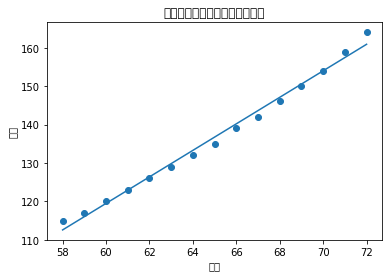

In [10]:
# 导入可视化模块matplotlib.pyplot，并取别名为plt
# %matplotlib inline用于设置在jupyter notebook行内显示图形
# %matplotlib inline

# 此处应注意matplotlib的中文显示问题，需进行简单的配置
# 请参看知乎（https://www.zhihu.com/question/25404709）第一个回答

import matplotlib.pyplot as plt

# 绘制原women数据的散点图
plt.scatter(women.height, women.weight)

# 绘制用训练模型根据women.height预测的predicted_weight
plt.plot(women.height, predicted_weight)

# 添加标题
plt.title('女性体重与身高的线性回归分析')

# 添加X轴名称
plt.xlabel('身高')

# 添加Y轴名称
plt.ylabel('体重')

# 显示绘图
plt.show()

#### （7）生成报告

In [11]:
# 重新绘制一遍图形，并将结果保存为PDF文件
# 若之前为调用show()方法，则可直接保存
# 可在调用show()方法之前绘制结果

# 绘制原women数据的散点图
plt.scatter(women.height, women.weight)

# 绘制用训练模型根据women.height预测的predicted_weight
plt.plot(women.height, predicted_weight)

# 添加标题
plt.title('女性体重与身高的线性回归分析')

# 添加X轴名称
plt.xlabel('身高')

# 添加Y轴名称
plt.ylabel('体重')

# 调用savefig()函数，保存会绘制结果
# 也可保存为其他格式，如png, jpg, svg等
plt.savefig('线性回归结果.pdf')

# 查看绘制结果，查看后绘图面板会变为空白
# plt.show()

#### 6.3 机器学习

【例1】KNN算法

#### （1）数据读入

In [12]:
# 数据已存放在当前目录下
# 使用pandas.read_csv()函数读取csv数据集
# 由于数据没有列名信息，header设置为None
bc_data = pd.read_csv('bc_data.csv', header=0)

# 查看前五个观测值
# 注意：该数据集第一个变量为ID，无实际意义；第二个变量为诊断结果；
# 后30个变量为特征值
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### （2）数据理解

In [13]:
# 查看描述性统计分析
print(bc_data.describe())

# 查看列名
print(bc_data.columns)

# 查看形状
print(bc_data.shape)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

#### （4）数据准备

In [14]:
# 导入train_test_split()函数用于构建训练集和测试集
# 导入KNeighborsClassifier分类器
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 删除没有实际意义的ID项数据
data = bc_data.drop(['id'], axis=1)

# 查看删除后的数据项
# print(data.head())

# 获取特征矩阵
X_data = data.drop(['diagnosis'], axis=1)

# 获取结果数组
# np.ravel()用于降维处理
y_data = np.ravel(data[['diagnosis']])

# 拆分测试数据与训练数据
# 用train_test_split()随机拆分训练集合测试集
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1)

# train_test_split?
# 查看训练数据与测试数据的数量
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


H:\Python\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### （5）数据建模

In [17]:
# 创建KNN分类模型
model = KNeighborsClassifier(algorithm='kd_tree')

# 用训练集训练模型
model.fit(X_train, y_train)

# 用训练模型预测测试集数据
y_model = model.predict(X_test)

# 查看预测结果和测试集的结果
# print(y_model)
# print(y_test)

# 计算预测准确率
np.mean(y_model == y_test)

0.93706293706293708

#### （6）模型准确率

In [18]:
# 导入accaccuracy_score()函数用于计算模型的准确率
from sklearn.metrics import accuracy_score

# 查看模型的准确率
print(accuracy_score(y_test, y_model))

0.937062937063


【例2】K-Means算法

#### （1）数据导入

In [19]:
# 读入数据
protein = pd.read_table('protein.txt', sep='\t')

# 查看前5条数据
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


#### （2）数据理解

In [20]:
# 查看描述性统计分析
print(protein.describe())

         RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr&Veg  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min     0.600000   0.700000   1.400000  
25%     3.100000   1.500000   2.900000  
50%     4.700000   2.400000   3.800000  
75%     5.700000   4.700000   4.90000

In [15]:
# 查看列名
print(protein.columns)

Index(['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starch', 'Nuts', 'Fr&Veg'],
      dtype='object')


In [21]:
# 查看行数和列数
# 返回（行数, 列数）
print(protein.shape)

(25, 10)


#### （3）数据转换


In [22]:
from sklearn import preprocessing

# 由于Country不是一个特征值，故舍去
sprotein = protein.drop(['Country'], axis=1)

# 对数据进行标准化处理
sprotein_scaled = preprocessing.scale(sprotein)

# 查看处理结果
print(sprotein_scaled)

[[ 0.08294065 -1.79475017 -2.22458425 -1.1795703  -1.22503282  0.9348045
  -2.29596509  1.24796771 -1.37825141]
 [-0.28297397  1.68644628  1.24562107  0.40046785 -0.6551106  -0.39505069
  -0.42221774 -0.91079027  0.09278868]
 [ 1.11969872  0.38790475  1.06297868  0.05573225  0.06479116 -0.5252463
   0.88940541 -0.49959828 -0.07694671]
 [-0.6183957  -0.52383718 -1.22005113 -1.2657542  -0.92507375  2.27395937
  -1.98367386  0.32278572  0.03621022]
 [-0.03903089  0.96810416 -0.12419682 -0.6624669  -0.6851065   0.19082957
   0.45219769 -1.01358827 -0.07694671]
 [ 0.23540507  0.8023329   0.69769391  1.13303099  1.68457011 -0.96233157
   0.3272812  -1.21918427 -0.98220215]
 [-0.43543839  1.02336124  0.69769391 -0.86356267  0.33475432 -0.71124003
   1.38907137 -1.16778527 -0.30326057]
 [-0.10001666 -0.82775116 -0.21551801  2.38269753  0.45473794 -0.55314536
   0.51465594 -1.06498727 -1.5479868 ]
 [ 2.49187852  0.55367601  0.33240914  0.34301192  0.42474204 -0.385751
   0.3272812  -0.34540128 

#### （4）数据建模

In [23]:
# 导入KMeans类型
from sklearn.cluster import KMeans

# 实例化一个KMeans聚类器
# n_cluster为聚类中心
kmeans = KMeans(n_clusters=5)

# 训练模型
kmeans.fit(sprotein)

# dir(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### （5）查看模型

In [24]:
# 查看模型
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


#### （6）模型预测

In [25]:
# 预测聚类结果
y_kmeans = kmeans.predict(sprotein)
print(y_kmeans)

[2 4 4 0 2 1 4 1 4 2 2 4 2 4 1 2 3 0 3 1 4 4 2 4 0]


#### （7）结果输出

In [26]:
def print_kmcluster(k):
    '''用于聚类结果的输出
       k：为聚类中心个数
    '''
    for i in range(k):
        print('聚类', i)
        ls = []
        for index, value in enumerate(y_kmeans):
            if i == value:
                ls.append(index)
        print(protein.loc[ls, ['Country', 'RedMeat', 'Fish', 'Fr&Veg']])
            
print_kmcluster(5)          

聚类 0
       Country  RedMeat  Fish  Fr&Veg
3     Bulgaria      7.8   1.2     4.2
17     Romania      6.2   1.0     2.8
24  Yugoslavia      4.4   0.6     3.2
聚类 1
    Country  RedMeat  Fish  Fr&Veg
5   Denmark     10.6   9.9     2.4
7   Finland      9.5   5.8     1.4
14   Norway      9.4   9.7     2.7
19   Sweden      9.9   7.5     2.0
聚类 2
           Country  RedMeat  Fish  Fr&Veg
0          Albania     10.1   0.2     1.7
4   Czechoslovakia      9.7   2.0     4.0
9           Greece     10.2   5.9     6.5
10         Hungary      5.3   0.3     4.2
12           Italy      9.0   3.4     6.7
15          Poland      6.9   3.0     6.6
22            USSR      9.3   3.0     2.9
聚类 3
     Country  RedMeat  Fish  Fr&Veg
16  Portugal      6.2  14.2     7.9
18     Spain      7.1   7.0     7.2
聚类 4
        Country  RedMeat  Fish  Fr&Veg
1       Austria      8.9   2.1     4.3
2       Belgium     13.5   4.5     4.0
6     E Germany      8.4   5.4     3.6
8        France     18.0   5.7     6.5
11      I

#### 6.4 数据可视化

#### （1）数据准备

In [27]:
# 读取数据
salaries = pd.read_csv('salaries.csv', index_col=0)

# 查看数据
salaries.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


#### （2）导入matplotlib包

In [28]:
# 导入matplotlib.pyplot模块，并取别名为plt
import matplotlib.pyplot as plt
# 导入seaborn包，并取别名为sns
# 如果为安装该包，可在系统命令行下使用一下命令安装
# pip install seaborn
# conda install seaborn
import seaborn as sns
# 设置行内显示图片
%matplotlib inline


#### （3）可视化绘图

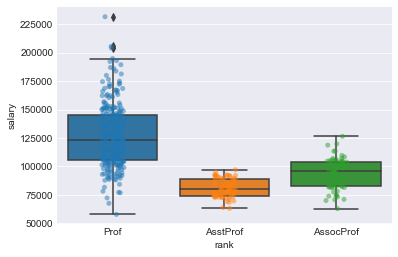

In [29]:
# 设置图片样式
sns.set_style('darkgrid')

# 绘制散点图
sns.stripplot(data=salaries, x='rank', y='salary', jitter=True, alpha=0.5)

# 绘制箱线图
sns.boxplot(data=salaries, x='rank', y='salary')